In [21]:
from datasets import load_dataset
import pandas as pd
import collections
from io import StringIO
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [8]:
dataset = load_dataset("simbolo-ai/burmese-hate-speech-small")

df = pd.DataFrame(dataset['train'])
print(df.head())
df.to_csv('data.csv',index=False)



                                                text
0          အမိမှန်ပေမယ့်  အဖမမှန်ရင်  မျိုးမစစ်နိုင်
1  aphကျိ မိ တဲ့ မျတ်လုံး ကို ဖဲ ရဖောက် ထုတ်ပစ် က...
2  ထင်သလို နိပ် စက်ယုတ်မာ လိမ်လည် ကောက်ကျစ် လို့ ...
3  Company တွေ မှား နေ ရင် တောင်ဝန်ကြီး တွေ ပြော ...
4  တကယ် အံ့ဩ ပါ တယ် က ဘာ မှာ မြေစား တဲ့ သူ တွေ လည...


In [ ]:
dataset2= load_dataset("simbolo-ai/encrypted-burmese-hate-speech")
df2 = pd.DataFrame(dataset2['train'])
df2.to_csv('data_encrypt.csv',index=False)

In [17]:
# Replace 'myHateSpeech_ver1.0.txt' with the actual path to your file
with open('myHateSpeech_ver1.0.txt', 'r', encoding='utf-8') as file:
    file_content = file.read()
# Split the content into individual lines
lines = file_content.strip().split('\n')

# Initialize a counter to store the class frequencies
class_counts = collections.Counter()

# Iterate over each line to extract the label
for line in lines:
    # Skip any empty lines
    if not line.strip():
        continue
    
    # Split the line by the tab character
    parts = line.split('\t')
    
    # The label is the last part of the split string
    # Some lines may have multiple labels separated by '|', we'll handle this.
    # We take the last part of the line, and then split by '|' if it exists.
    last_part = parts[-1]
    
    # Check if there are multiple labels
    if '|' in last_part:
        # Split by '|' and get the last label
        label = last_part.split('|')[-1]
    else:
        label = last_part
    
    # Remove any leading/trailing whitespace from the label
    label = label.strip()
    
    # Update the counter for the extracted label
    class_counts[label] += 1

# Print the results
print("Class distribution in the dataset:")
for label, count in class_counts.items():
    print(f"  - {label}: {count}")

print(f"\nTotal number of samples: {sum(class_counts.values())}")

Class distribution in the dataset:
  - ab: 5664
  - no: 1834
  - re: 101
  - po: 1032
  - se: 291
  - bo: 542
  - le: 323
  - ed: 226
  - ra: 122
  - : 2
  - Tataungsrr/ab တွေ ရယ် မီး ပေး တာ မှ 9 နာရီ က နေ 1 နာရီ ထိ လေး ပဲ လာ ပေး တာ လာ ပေး တဲ့ အချိန် မှာ တောင် ခိုး တဲ့ ဟာ တွေ ခဏခဏ ဖျက် နေ တာ အခု လည်း 11: 1
  - /ab: 1
  - ab ‌: 1

Total number of samples: 10140


Successfully loaded myHateSpeech_ver1.0.txt

DataFrame with top 3 classes saved to 'top_3_hate_speech_data.csv'
Top 3 classes distribution:
label
ab    5664
no    1834
po    1032
Name: count, dtype: int64

Successfully loaded data.csv
Unlabeled DataFrame head:
                                                text
0          အမိမှန်ပေမယ့်  အဖမမှန်ရင်  မျိုးမစစ်နိုင်
1  aphကျိ မိ တဲ့ မျတ်လုံး ကို ဖဲ ရဖောက် ထုတ်ပစ် က...
2  ထင်သလို နိပ် စက်ယုတ်မာ လိမ်လည် ကောက်ကျစ် လို့ ...
3  Company တွေ မှား နေ ရင် တောင်ဝန်ကြီး တွေ ပြော ...
4  တကယ် အံ့ဩ ပါ တယ် က ဘာ မှာ မြေစား တဲ့ သူ တွေ လည...

Unlabeled DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB

Bar chart saved as 'top_3_classes_distribution.png'


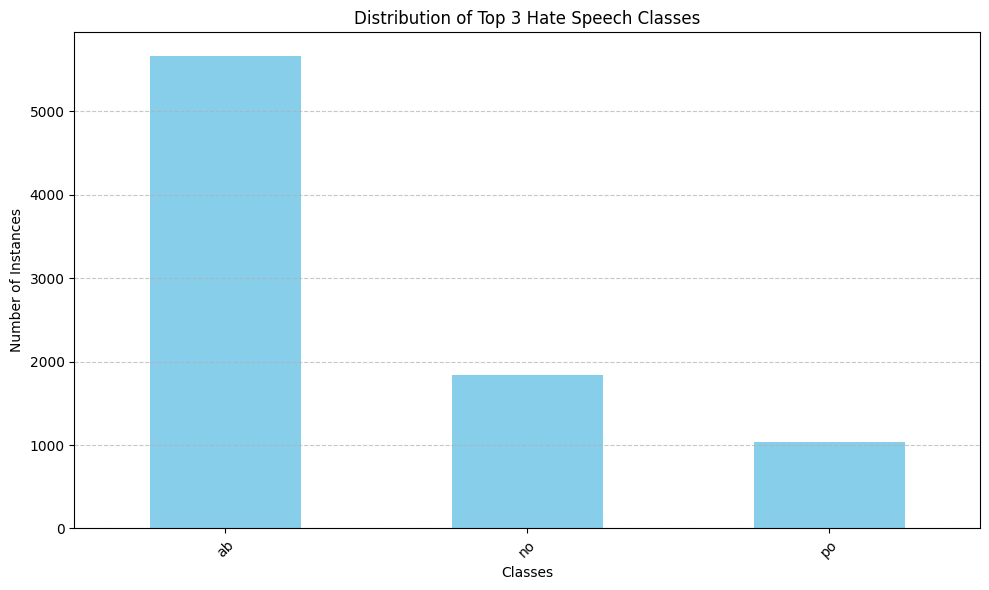

In [ ]:


# --- PART 1: Process the labeled myHateSpeech_ver1.0.txt data ---

# Load the myHateSpeech_ver1.0.txt file
# We'll use a tab delimiter and manually provide column names as there is no header.
try:
    hate_speech_df = pd.read_csv(
        'myHateSpeech_ver1.0.txt',
        sep='\t',
        header=None,
        names=['text', 'label'],
        # Set the correct encoding to handle Myanmar script
        encoding='utf-8'
    )
    print("Successfully loaded myHateSpeech_ver1.0.txt")
except Exception as e:
    print(f"Error loading file: {e}")
    # Handle potential inconsistent separators by splitting manually
    with open('myHateSpeech_ver1.0.txt', 'r', encoding='utf-8') as f:
        content = f.read()
    rows = [line.split('\t') for line in content.splitlines() if '\t' in line]
    hate_speech_df = pd.DataFrame(rows, columns=['text', 'label'])

# Clean up the labels to handle trailing spaces or inconsistent characters
hate_speech_df['label'] = hate_speech_df['label'].str.strip()

# Get the top 3 most frequent labels
label_counts = hate_speech_df['label'].value_counts()
top_3_labels = label_counts.nlargest(3).index.tolist()

# Filter the DataFrame to keep only the top 3 classes
top_3_df = hate_speech_df[hate_speech_df['label'].isin(top_3_labels)].copy()

# Save the top 3 data to a new CSV file
top_3_df.to_csv('top_3_hate_speech_data.csv', index=False)
print("\nDataFrame with top 3 classes saved to 'top_3_hate_speech_data.csv'")
print("Top 3 classes distribution:")
print(top_3_df['label'].value_counts())


# --- PART 2: Process the unlabeled data.csv file ---

# Load the data.csv file, which only has a 'text' column
try:
    unlabeled_df = pd.read_csv('data.csv', encoding='utf-8')
    print("\nSuccessfully loaded data.csv")
    print("Unlabeled DataFrame head:")
    print(unlabeled_df.head())
    print("\nUnlabeled DataFrame info:")
    unlabeled_df.info()
except Exception as e:
    print(f"Error loading data.csv: {e}")


# --- PART 3: Visualize the Top 3 Classes Distribution ---

# Create a bar chart to visualize the distribution of the top 3 classes


# Count the number of instances for each of the top 3 labels
top_3_counts = top_3_df['label'].value_counts()

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Plot the bar chart
top_3_counts.plot(kind='bar', color='skyblue')

# Add titles and labels for clarity
plt.title('Distribution of Top 3 Hate Speech Classes')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

# Add a grid for easier comparison of bar heights
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Save the plot to a file
plt.savefig('top_3_classes_distribution.png')
print("\nBar chart saved as 'top_3_classes_distribution.png'")
